# knn_model Exercise

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import prepare
import util

**Get dataset**

In [26]:
# use the titanic data feom prepare file
titanic = prepare.prep_titanic()

titanic= titanic.drop(columns=["age"])
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


**Split the data**

In [27]:
train, validate, test = prepare.split_data_(df=titanic, validate_size=.25, random_state=95, stratify_col="survived")

In [28]:
train.shape, validate.shape, test.shape

((489, 12), (223, 12), (179, 12))

**Create X & y version of train, where y is a series with just the target variable and X are all the features.**

In [42]:
# get only the valid feature columns to the model
columns = []
for i in train.columns:
    if i in ["embarked", "sex", "passenger_id", "survived"]:
        pass
    else:
        columns.append(i)

In [44]:
# features from p calss to alone
xtrain = train[columns]

# y variable to be predicted
ytrain = train.survived

# -------------------------------------
# features from p calss to alone
xvalidate = validate[columns]

# y variable to be predicted
yvalidate = validate.survived

# -------------------------------------
# features from p calss to alone
xtest = test[columns]

# y variable to be predicted
ytest= test.survived

1. **Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)**

### Train Model

In [87]:
# get a knn object
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)
knn

KNeighborsClassifier(n_neighbors=3, p=1)

**Fit training data**

In [88]:
knn.fit(xtrain, ytrain) 

KNeighborsClassifier(n_neighbors=3, p=1)

**Make prediction**

In [89]:
ypred = knn.predict(xtrain)
ypred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

**Estimate probability**

In [90]:
ypred_proba = knn.predict_proba(xtrain)
ypred_proba[:5]

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

In [91]:
# survised = 1 
# didn't make it = 0
knn.classes_

array([0, 1])

**2. Evaluate your results using the model score, confusion matrix, and classification report.**

**Compute the Accuracy**

In [92]:
print(f"accuracy of KNN classifier on training is {knn.score(xtrain, ytrain)}")

accuracy of KNN classifier on training is 0.8588957055214724


**createa comfusion matris**

In [95]:
# confution matrix agaist the prediction
survived_cm = confusion_matrix(ytrain, ypred)
survived_cm

array([[271,  31],
       [ 38, 149]])

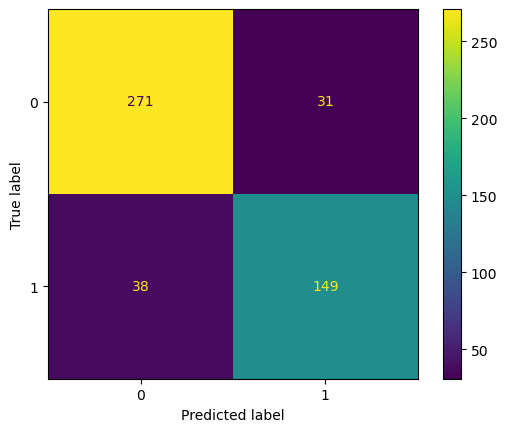

In [98]:
ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [104]:
# clssifiaction report for all matrics
class_report = classification_report(ytrain, ypred)

print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       302
           1       0.83      0.80      0.81       187

    accuracy                           0.86       489
   macro avg       0.85      0.85      0.85       489
weighted avg       0.86      0.86      0.86       489



4. Run through steps 1-3 setting k to 10

accuracy of KNN classifier on training is 0.7750511247443763
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       302
           1       0.76      0.60      0.67       187

    accuracy                           0.78       489
   macro avg       0.77      0.74      0.75       489
weighted avg       0.77      0.78      0.77       489



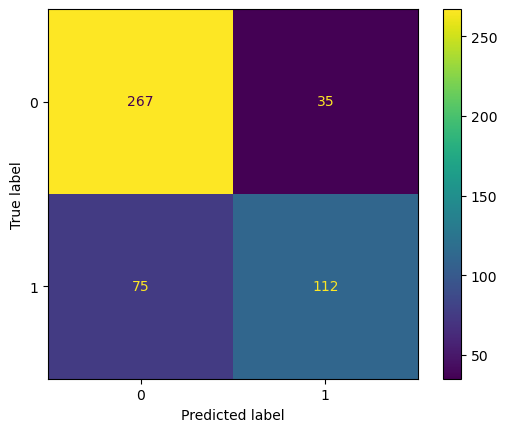

In [108]:
# def compute_knn(xtrain, ytrain):
# get a knn object
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', p=1)

knn.fit(xtrain, ytrain) 

ypred = knn.predict(xtrain)

ypred_proba = knn.predict_proba(xtrain)

print(f"accuracy of KNN classifier on training is {knn.score(xtrain, ytrain)}")

# confution matrix agaist the prediction
survived_cm = confusion_matrix(ytrain, ypred)

class_report = classification_report(ytrain, ypred)
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

5. Run through steps 1-3 setting k to 20

accuracy of KNN classifier on training is 0.7321063394683026
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       302
           1       0.70      0.53      0.60       187

    accuracy                           0.73       489
   macro avg       0.72      0.69      0.70       489
weighted avg       0.73      0.73      0.72       489



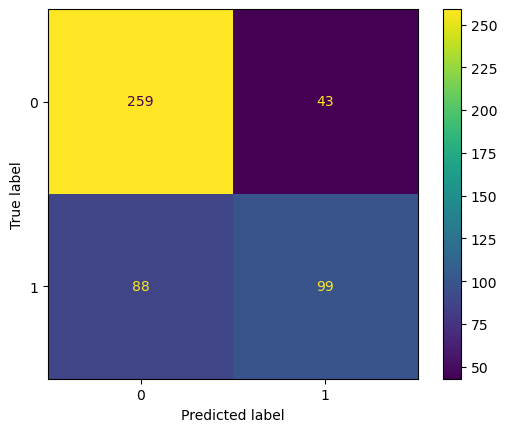

In [109]:
# def compute_knn(xtrain, ytrain):
# get a knn object
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform', p=1)

knn.fit(xtrain, ytrain) 

ypred = knn.predict(xtrain)

ypred_proba = knn.predict_proba(xtrain)

print(f"accuracy of KNN classifier on training is {knn.score(xtrain, ytrain)}")

# confution matrix agaist the prediction
survived_cm = confusion_matrix(ytrain, ypred)

class_report = classification_report(ytrain, ypred)
print(class_report)

ConfusionMatrixDisplay.from_estimator(knn, xtrain, ytrain)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?